          

$$  ASSIGNMENT - 02 $$

NAME : TASNIM RAHMAN MOUMITA

ID : 22301689

Section : 17


1(a) Using  SymPy  find  the particular solution, yp   of   the following ODE:
 $$(d ^ 2 * y)/(d * t ^ 2) - 6 * d/dt (y) + 25y = 50t ^ 3 - 36t ^ 2 - 63t + 18$$

In [2]:
#ANSWER TO THE QUESTION NO--01(a)

from sympy import *

t = symbols('t')      # Defining the symbols and function
y = Function('y')(t)

# Defining the given ODE
ode = y.diff(t, t) - 6 * y.diff(t) + 25 * y - (50 * t**3 - 36 * t**2 - 63 * t + 18) # Defining the given ODE

# Solve the ODE using dsolve
solve = dsolve(ode)

# Print the solution
print("∴ The Particular solution will be, (yp):", solve)

∴ The Particular solution will be, (yp): Eq(y(t), 2*t**3 - 3*t + (C1*sin(4*t) + C2*cos(4*t))*exp(3*t))


1(b) Suppose the population of rabbits (R) and wolves(W) are described by the
following equations: (5)

dR/dt = 0.001R(80 − W)
dW/dt = 0.00002W(−1000 + R)

Here, R(0) =last 4 digits of your student ID and W(0) = 5× section no.
Now solve the system of differential equations using Euler Method and plot R(t)
vs W(t) for t ∈ [0, 1000] with step size ∆t = 0.001. You can use NumPy &
Matplotlib.

Enter the last 4 digits of student ID: 1689
Enter section number: 17


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


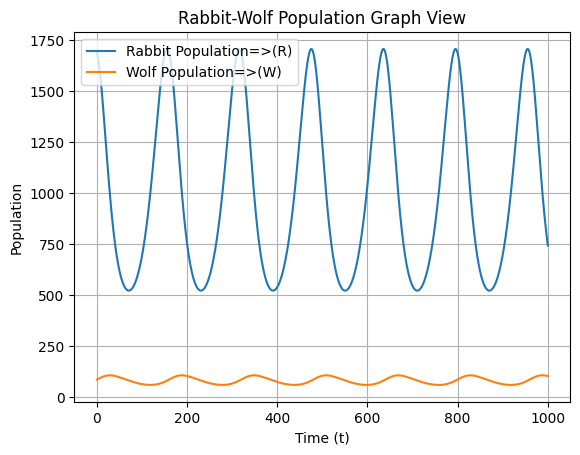

In [3]:
#ANSWER TO THE QUESTION NO--01(b)

import numpy as np
import matplotlib.pyplot as plt

# Getting initial conditions

stud_id = int(input("Enter the last 4 digits of student ID: "))
sec = int(input("Enter section number: "))

R_0 = stud_id
W_0 = 5 * sec

# Define differential equations as functions
def dR_dt(R, W):
    return 0.001 * R * (80 - W)

def dW_dt(R, W):
    return 0.00002 * W * (-1000 + R)

# Setting parameters

time_start = 0
time_end = 1000
dt = 0.001

number_of_steps = int((time_end - time_start) / dt) + 1  #  inclusive of t_end
t = np.linspace(time_start, time_end, number_of_steps)   # Creating time array

# Initializing solution arrays
R = np.zeros(number_of_steps)
W = np.zeros(number_of_steps)

# Setting initial condition
R[0] = R_0
W[0] = W_0

# Solving using Euler's method

for i in range(1, number_of_steps):
    dR = dR_dt(R[i - 1], W[i - 1]) * dt
    dW = dW_dt(R[i - 1], W[i - 1]) * dt
    R[i] = R[i - 1] + dR
    W[i] = W[i - 1] + dW


plt.plot(t, R, label='Rabbit Population=>(R)')
plt.plot(t, W, label='Wolf Population=>(W)')
plt.xlabel('Time (t)')
plt.ylabel('Population')
plt.title('Rabbit-Wolf Population Graph View')
plt.legend()
plt.grid(True)
plt.show()

**(2)** Consider the following ODE:

$$dy/dx − y = 2,  y(0) = 1$$

The analytic solution is given by y(x) = 3e

x−2. Let h be the step size. Now using the
Euler and Runge-Kutta (RK) Methods, calculate y(x = 1), and estimate the error
rate for both methods separately using the formula: e = (ycalculated − yactual)/yactual.
Here, at x = 1, we have yactual = 3e − 2. Now plot the error rate at x = 1
vs step size for both Euler and RK methods in the same graph. Take
h = 0.1, 0.2, 0.25, 0.5, 1. (Use scipy.integrate.solve ivp to implement RK method.)

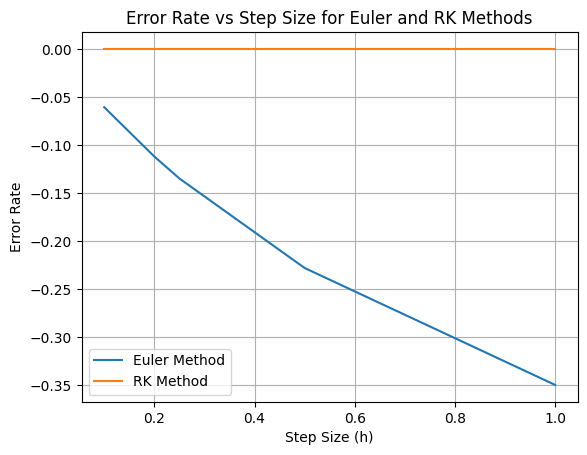

In [ ]:
#ANSWER TO THE QUESTION NO--02

from scipy import *
from numpy import *
from matplotlib.pyplot import *

# Define the ODE using lambda function

ode = lambda x, y: 2 + y

# Analytical solve

def y_actual(x):
    return 3 * exp(x) - 2    # Using exp from numpy

# Euler Method
def euler_method(ode, x0, y0, x_target, h):

    number_of_steps = int((x_target - x0) / h)  # Calculating number of steps

    x_val = [x0]

    for i in range(number_of_steps + 1):

        x_val.append(x0 + i * h)

    y_val = [y0]

    for i in range(number_of_steps):

        prev_y_val = y_val[-1]
        y_deriv = ode(x_val[i], y_val[i])
        incr = h * y_deriv             # Calculate the increment in y based on the derivative and step size
        next_y_val = prev_y_val + incr # Calculating next value of y by adding the increment to the previous value of y
        y_val.append(next_y_val)

    return y_val[-1]

# Calculating error rate

def calculate_error(y_calculated, y_actual):

    error_calculated = y_calculated - y_actual
    error_actual = y_actual

    if error_actual != 0:
      error_rate = error_calculated / error_actual
    else:
      error_rate = error_calculated

    return error_rate


# defining Parameters
x0 = 0
y0 = 1
x_target = 1
step_sizes = [0.1, 0.2, 0.25, 0.5, 1]
error_rates_euler = []
error_rates_rk = []


for h in step_sizes:
    #For Euler Method
    y_euler = euler_method(ode, x0, y0, x_target, h)
    error_euler = calculate_error(y_euler, y_actual(x_target))
    error_rates_euler.append(error_euler)

    # For RK method
    sol = integrate.solve_ivp(ode, (x0, x_target), [y0], t_eval=[x_target])
    y_rk = sol.y[0][-1]
    error_rk = calculate_error(y_rk, y_actual(x_target))
    error_rates_rk.append(error_rk)


plot(step_sizes, error_rates_euler, label='Euler Method')
plot(step_sizes, error_rates_rk, label='RK Method')
xlabel('Step Size (h)')
ylabel('Error Rate')
title('Error Rate vs Step Size for Euler and RK Methods')
legend()
grid(True)
show()